# Data Set Information:
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

# Attribute Information:
Date - Date (DD/MM/YYYY)

Time - Time (HH.MM.SS)

CO(GT) - True hourly averaged concentration CO in mg/m^3 (reference analyzer)

PT08.S1(CO) - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

PT08.S2(NMHC) - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

NOx(GT) - True hourly averaged NOx concentration in ppb (reference analyzer)

PT08.S3(NOx) - PT08.S3 (tungsten oxide) hourly averaged sensor response 
NO2(GT) - True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

PT08.S4(NO2) - PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

PT08.S5(O3) - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

T - Temperature in Â°C

RH - Relative Humidity (%)

AH - Absolute Humidity

Project Task 1 - Basic Classifiers and Evaluation

1) Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.

2) Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.

3) Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

4) Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.

5) Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).

6) Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.

7) Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

KNN gridsearch accuracy precision recall f1 cross validation roc auc lift chart

NAIVE BAYES gridsearch accuracy precision recall f1 cross validation roc auc lift chart

LOGISTIC REGRESSION gridsearch accuracy precision recall f1 cross validation roc auc lift chart

DECISION TREE gridsearch accuracy precision recall f1 cross validation roc auc lift chart

DIMENSIONALITY REDUCTION univariate,recursive,pca ecc..

IMBALANCED CASE 96%-4% Then solve again the classification task adopting the various techniques studied (or new ones)

LINEAR REGRESSION con attributi continui, anche multipla

CONCLUSIONI

In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from collections import defaultdict

import datetime
from sklearn import preprocessing

# Data Prepration


In [68]:
df = pd.read_csv("AirQualityUCI.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [70]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [71]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.874746,-159.090093,1.865683,894.476969,168.605536,794.871754,58.135834,1391.361975,974.953618,9.776852,39.483873,-6.837604,NaN,NaN
std,77.657170,329.818519,139.789093,41.380206,342.316710,257.427995,321.977764,126.931715,467.195781,456.926877,43.203377,51.215786,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1052.000000,-200.000000,7.900000,894.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [72]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis= 1, inplace = True)

In [73]:
df.Date.replace(to_replace = 'NaN',value = 0,inplace = True)

In [74]:
df.dropna(how = 'all',inplace=True)

In [75]:
#creo variabile target weekend

b = pd.DataFrame(df.Date)
b['Date'] = pd.to_datetime(b['Date'])

b['day_of_week'] = b['Date'].dt.day_name()

In [76]:
df['weekday'] = b['day_of_week']

In [77]:
tf = []
for i in df.weekday:
    if i == 'Sunday' or i == 'Saturday':
        tf.append(1)
    else:
        tf.append(0)

In [78]:
df['weekend'] = tf

In [79]:
df.reset_index(inplace=True)

In [80]:
df.drop(columns=['index','weekday','AH','NMHC(GT)'],axis = 1,inplace=True)

In [81]:
#unite tutte le variabili PT08 in una sola perchè altamente correlate

df['PT08_feat'] = ( df['PT08.S2(NMHC)'] + df['PT08.S1(CO)'] + df['PT08.S4(NO2)'] + df['PT08.S5(O3)']) / 4

In [82]:
df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)'],axis=1,inplace=True)

In [83]:
#i valori nulli contrassegnati da -200 sono stati sostituiti dalla media di ogni attributo

df.loc[df.PT08_feat < 0, 'PT08_feat'] = df.PT08_feat.mean()
df.loc[df['CO(GT)'] < 0, 'CO(GT)'] = df['CO(GT)'].mean()
df.loc[df['RH'] < 0, 'RH'] = df['RH'].mean()
df.loc[df['C6H6(GT)'] < -50, 'C6H6(GT)'] = df['C6H6(GT)'].mean()
df.loc[df['PT08.S3(NOx)'] < 0, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
df.loc[df['NO2(GT)'] < -50, 'NO2(GT)'] = df['NO2(GT)'].mean()
df.loc[df['T'] < -50, 'T'] = df['T'].mean()

In [84]:
df.head()

,Date,Time,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat
0,3/10/2004,18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,0,1341.50
1,3/10/2004,19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,0,1194.50
2,3/10/2004,20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,0,1242.25
3,3/10/2004,21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,0,1277.75
4,3/10/2004,22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,0,1177.00


# Time Series

In [96]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4


Populating the interactive namespace from numpy and matplotlib


In [86]:
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

In [87]:
df.drop(columns=['Date','Time'],axis = 1,inplace=True)

In [88]:
df.set_index(df.Datetime, inplace = True)

In [90]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat,Datetime
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,0,1341.50,2004-03-10 18:00:00
2004-03-10 19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,0,1194.50,2004-03-10 19:00:00
2004-03-10 20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,0,1242.25,2004-03-10 20:00:00
2004-03-10 21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,0,1277.75,2004-03-10 21:00:00
2004-03-10 22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,0,1177.00,2004-03-10 22:00:00


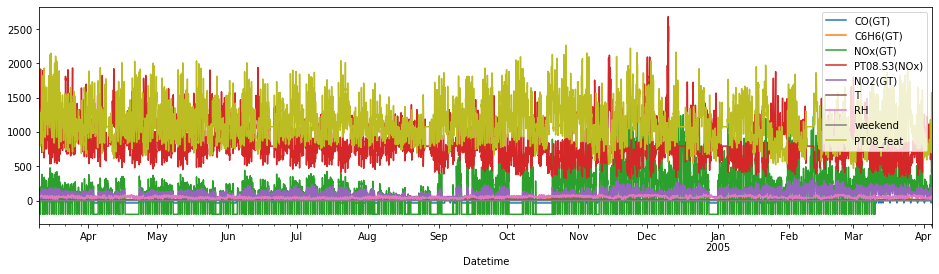

In [97]:
df.set_index("Datetime").plot()

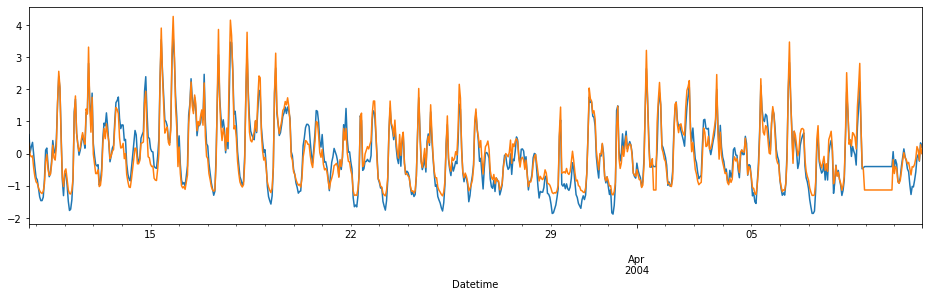

In [194]:
#confronto PT08 e C6H6 altamente correlate
#in quale periodo?

ts3 = df['PT08_feat'].loc["2004-03-10" : "2004-04-10"]
ts4 = df['C6H6(GT)'].loc["2004-03-10" : "2004-04-10"]

ts3 = (ts3-ts3.mean())/ts3.std()
ts4 = (ts4 - ts4.mean())/ts4.std()

ts3.plot()
ts4.plot()

In [195]:
df.describe()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-4.387203,9.761680,168.605536,833.786263,103.434438,17.982294,48.851309,0.287272,1127.383115
std,14.027700,7.474419,257.427995,251.865233,48.631623,8.814727,17.079489,0.452514,274.459534
min,-34.207524,0.100000,-200.000000,322.000000,2.000000,-1.900000,9.200000,0.000000,469.500000
25%,0.600000,4.000000,50.000000,666.000000,58.135834,10.900000,36.600000,0.000000,930.750000
50%,1.500000,7.900000,141.000000,794.871754,96.000000,17.200000,48.600000,0.000000,1079.000000
75%,2.600000,13.600000,284.000000,960.000000,133.000000,24.100000,61.900000,1.000000,1290.000000
max,11.900000,63.700000,1479.000000,2683.000000,340.000000,44.600000,88.700000,1.000000,2265.500000


In [196]:
df.min()

CO(GT)                     -34.2075
C6H6(GT)                        0.1
NOx(GT)                        -200
PT08.S3(NOx)                    322
NO2(GT)                           2
T                              -1.9
RH                              9.2
weekend                           0
PT08_feat                     469.5
Datetime        2004-03-10 18:00:00
dtype: object

In [98]:
df.max()

CO(GT)                         11.9
C6H6(GT)                       63.7
NOx(GT)                        1479
PT08.S3(NOx)                   2683
NO2(GT)                         340
T                              44.6
RH                             88.7
weekend                           1
PT08_feat                    2265.5
Datetime        2005-04-04 14:00:00
dtype: object

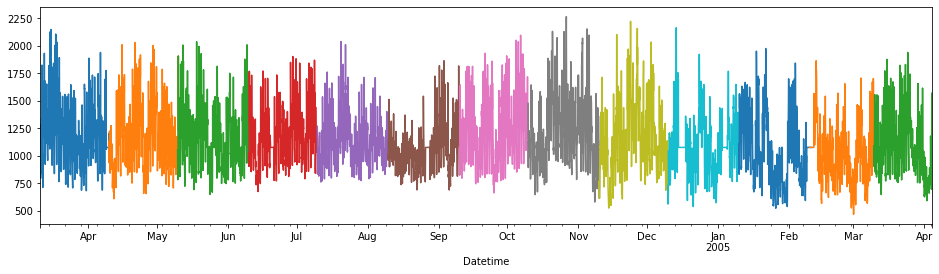

In [197]:
#PT_08 distribuzione annuale, mesi colori differenti
#approfondire min max con grafico mensile

ts = df['PT08_feat'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['PT08_feat'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['PT08_feat'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['PT08_feat'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['PT08_feat'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['PT08_feat'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['PT08_feat'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['PT08_feat'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['PT08_feat'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['PT08_feat'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['PT08_feat'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['PT08_feat'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['PT08_feat'].loc["2005-03-10" : "2005-04-10"]

ts.plot()
ts1.plot()
ts2.plot()
ts3.plot()
ts4.plot()
ts5.plot()
ts6.plot()
ts7.plot()
ts8.plot()
ts9.plot()
ts10.plot()
ts11.plot()
ts12.plot()

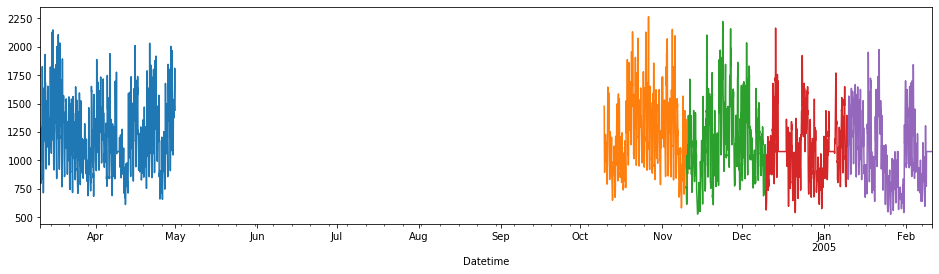

In [198]:
#mesi con valori MAX (tagliare)
#COME TROVO I RECORD?

ts_aprile = df['PT08_feat'].loc["2004-03-1" : "2004-04-30"]

ts_ottobre = df['PT08_feat'].loc["2004-10-10" : "2004-11-10"]
ts_novembre = df['PT08_feat'].loc["2004-11-10" : "2004-12-10"]
ts_dicembre = df['PT08_feat'].loc["2004-12-10" : "2005-01-10"]
ts_gennaio = df['PT08_feat'].loc["2005-01-10" : "2005-02-10"]

ts_aprile.plot()
ts_ottobre.plot()
ts_novembre.plot()
ts_dicembre.plot()
ts_gennaio.plot()

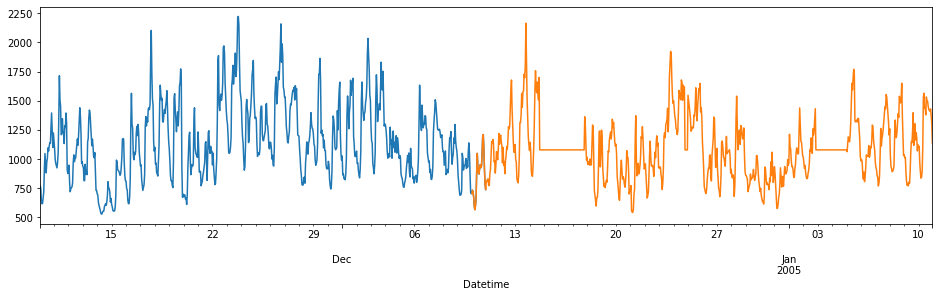

In [199]:
ts8 = df['PT08_feat'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['PT08_feat'].loc["2004-12-10" : "2005-01-10"]

#cosa sono gli stalli a 0? Outliers?

ts8.plot()
ts9.plot()

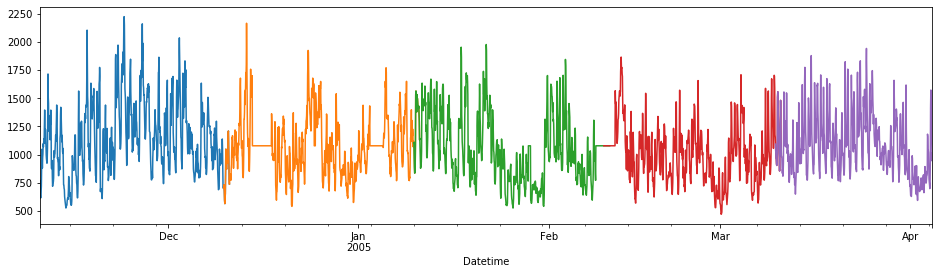

In [200]:
#VALORI MIN



ts8 = df['PT08_feat'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['PT08_feat'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['PT08_feat'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['PT08_feat'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['PT08_feat'].loc["2005-03-10" : "2005-04-10"]

ts8.plot()
ts9.plot()
ts10.plot()
ts11.plot()
ts12.plot()

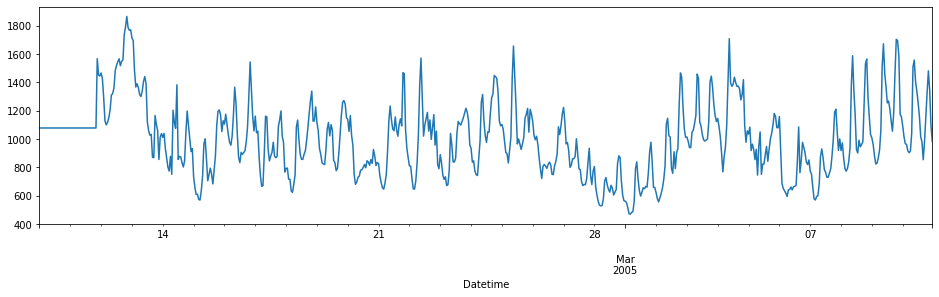

In [201]:
#min 29 marzo, weekend?

ts11 = df['PT08_feat'].loc["2005-02-10" : "2005-03-10"]
ts11.plot()

In [58]:
#elimini valori minori di 0 perchè outliers

df = df[df['CO(GT)'] >= 0]

In [59]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat,Datetime
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,0,1341.50,2004-03-10 18:00:00
2004-03-10 19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,0,1194.50,2004-03-10 19:00:00
2004-03-10 20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,0,1242.25,2004-03-10 20:00:00
2004-03-10 21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,0,1277.75,2004-03-10 21:00:00
2004-03-10 22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,0,1177.00,2004-03-10 22:00:00


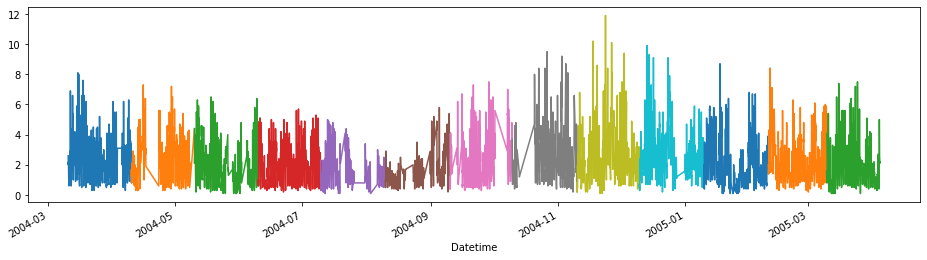

In [60]:
#CO(GT) distribuzione annuale, mesi colori differenti
#approfondire min max con grafico mensile

ts = df['CO(GT)'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['CO(GT)'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['CO(GT)'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['CO(GT)'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['CO(GT)'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['CO(GT)'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['CO(GT)'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['CO(GT)'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['CO(GT)'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['CO(GT)'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['CO(GT)'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['CO(GT)'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['CO(GT)'].loc["2005-03-10" : "2005-04-10"]

ts.plot()
ts1.plot()
ts2.plot()
ts3.plot()
ts4.plot()
ts5.plot()
ts6.plot()
ts7.plot()
ts8.plot()
ts9.plot()
ts10.plot()
ts11.plot()
ts12.plot()

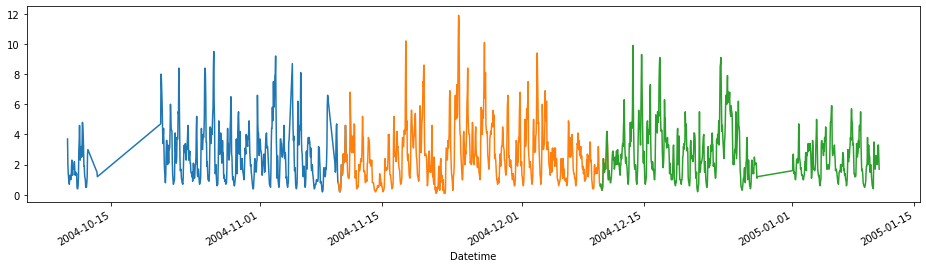

In [62]:
#maggiore concentrazione di CO nel mese di dicembre

ts7 = df['CO(GT)'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['CO(GT)'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['CO(GT)'].loc["2004-12-10" : "2005-01-10"]


ts7.plot()
ts8.plot()
ts9.plot()